**Описание переменных**

Year - год, для которого приводятся данные (1960-1990). (Порядковый.)

GDP - ВВП Республики Корея в долларах США, соответствует текущему курсу. (Числовые, непрерывные.) 

GDP per capita - ВВП на душу населения Республики Корея в долларах США, соответствует текущему курсу. (Числовые, непрерывные.)

Inflation - уровень инфляции для каждого года в процентах. (Числовые, непрерывные.)

Export - доля экспорта в структуре ВВП Республики Корея в процентах. (Числовые, непрерывные.)

Import - доля импорта в структуре ВВП Республики Корея в процентах. (Числовые, непрерывные.) 

Investments - прямые иностранные инвестиции в экономику Республики Корея в долларах США, соответствует текущему курсу. (Числовые, непрерывные.)

Reserves - золотовалютные резервы Республики Корея в в долларах США, соответствует текущему курсу. (Числовые, непрерывные.) 

Industry - доля промышленного производства в структуре ВВП Республики Корея в процентах. (Числовые, непрерывные.)

Goods export - товарный экспорт (вывоз произведенной в стране физической продукции) в долларах США, соответствует текущему курсу. (Числовые, непрерывные.)

Electronics - валовая добавленная стоимость и факторный доход сферы электроники в миллионах вон, соответсвует текущему курсу. (Числовые, непрерывные.)

Urban population - процент городского населения в Республике Корея. (Числовые, непрерывные.)

Electricity consumption - потребление электроэнергии на душу населения в КВт. (Числовые, непрерывные.)

Educational expenditures - доля от ВВП, направленная правительством в сферу образвания. (Числовые, непрерывные.)

Источник данных: World Bank, KOSIS.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('economy.csv')
data.head()

,Year,GDP,GDP per capita,Inflation,Export,Import,Investments,Reserves,Industry,Goods export,Electronics,Urban population,Electricity consumption,Educational expenditures
0,1960,3958811881,"158,2741","7,965566","2,641056","11,96479",NaN,"1,57E+08","17,32693",32000000,NaN,"27,71",NaN,NaN
1,1961,2417628737,"93,83138","8,195653","4,043752","13,95426",NaN,"2,07E+08","17,89857",41000000,NaN,"28,531",NaN,NaN
2,1962,2814615385,"106,1597","6,618311","3,880842","15,60536",NaN,"1,69E+08","17,90107",56000000,NaN,"29,461",NaN,NaN
3,1963,3988461538,"146,3025","20,69165","3,953713","14,65767",NaN,"1,31E+08","18,07136",87000000,NaN,"30,407",NaN,NaN
4,1964,3459019943,"123,6064","29,46283","4,961471","12,3834",NaN,"1,36E+08","19,34568","1,18E+08",NaN,"31,372",NaN,NaN


In [2]:
# проверка пропусков по колонкам

data.isna().mean()

Year                        0.000000
GDP                         0.000000
GDP per capita              0.000000
Inflation                   0.000000
Export                      0.000000
Import                      0.000000
Investments                 0.548387
Reserves                    0.000000
Industry                    0.000000
Goods export                0.000000
Electronics                 0.322581
Urban population            0.000000
Electricity consumption     0.354839
Educational expenditures    0.387097
dtype: float64

In [3]:
# удаление столбца с пропусками более 40%
data.drop('Investments', axis=1, inplace=True)

In [4]:
# процент пропусков
round(data.isna().sum().sum() / data.count().sum() * 100)

9

In [5]:
# проверка типа данных

data.dtypes

Year                          int64
GDP                          object
GDP per capita               object
Inflation                    object
Export                       object
Import                       object
Reserves                     object
Industry                     object
Goods export                 object
Electronics                  object
Urban population             object
Electricity consumption     float64
Educational expenditures     object
dtype: object

In [6]:
# изменение типов данных

data['GDP'] = data['GDP'].str.replace(',', '.', regex=False).astype(float)
data['GDP per capita'] = data['GDP per capita'].str.replace(',', '.', regex=False).astype(float).round(2)
data['Inflation'] = data['Inflation'].str.replace(',', '.', regex=False).astype(float).round(2)
data['Export'] = data['Export'].str.replace(',', '.', regex=False).astype(float).round(2)
data['Import'] = data['Import'].str.replace(',', '.', regex=False).astype(float).round(2)
data['Reserves'] = data['Reserves'].str.replace(',', '.', regex=False).astype(float)
data['Industry'] = data['Industry'].str.replace(',', '.', regex=False).astype(float).round(2)
data['Goods export'] = data['Goods export'].str.replace(',', '.', regex=False).astype(float)
data['Electronics'] = data['Electronics'].str.replace(',', '.', regex=False).astype(float)
data['Urban population'] = data['Urban population'].str.replace(',', '.', regex=False).astype(float).round()
#data['Electricity consumption'] = data['Electricity consumption'].str.replace(',', '.', regex=False).astype(float).round(2)
data['Educational expenditures'] = data['Educational expenditures'].str.replace(',', '.', regex=False).astype(float).round(2)

data.dtypes

Year                          int64
GDP                         float64
GDP per capita              float64
Inflation                   float64
Export                      float64
Import                      float64
Reserves                    float64
Industry                    float64
Goods export                float64
Electronics                 float64
Urban population            float64
Electricity consumption     float64
Educational expenditures    float64
dtype: object

In [7]:
# обработка пропусков

med_el = data['Electronics'].median()
med_con = data['Electricity consumption'].median()
med_edu = data['Educational expenditures'].median()

data['Electronics'] = data['Electronics'].fillna(med_el)
data['Electricity consumption'] = data['Electricity consumption'].fillna(med_con)
data['Educational expenditures'] = data['Educational expenditures'].fillna(med_edu)
data.head()

,Year,GDP,GDP per capita,Inflation,Export,Import,Reserves,Industry,Goods export,Electronics,Urban population,Electricity consumption,Educational expenditures
0,1960,3.958812e+09,158.27,7.97,2.64,11.96,157000000.0,17.33,32000000.0,3933.1,28.0,943.0,3.22
1,1961,2.417629e+09,93.83,8.20,4.04,13.95,207000000.0,17.90,41000000.0,3933.1,29.0,943.0,3.22
2,1962,2.814615e+09,106.16,6.62,3.88,15.61,169000000.0,17.90,56000000.0,3933.1,29.0,943.0,3.22
3,1963,3.988462e+09,146.30,20.69,3.95,14.66,131000000.0,18.07,87000000.0,3933.1,30.0,943.0,3.22
4,1964,3.459020e+09,123.61,29.46,4.96,12.38,136000000.0,19.35,118000000.0,3933.1,31.0,943.0,3.22


**Унификация данных**

Столбцы GDP, Reserves, Good export в изначальной статистике посчитаны в долл. США, что является очень неудобным, учитывая величины этих показетелей. А столбец Electronics преставлен в млн. вон, и эта разница валют не дает возможности проанализировать вклад электронной промышленности в ВВП. Поэтому было решено привести все эти столбцы к единому измерению - млрд долларов США.

In [8]:
# унификация валюты, приведение к млрд дол. США

data['GDP'] = data['GDP'].apply(lambda x: int(x // 1000000000))
data['Reserves'] = data['Reserves'].apply(lambda x: round(x / 1000000000, 3))
data['Goods export'] = data['Goods export'].apply(lambda x: round(x / 1000000000, 3))
data['Electronics'] = data['Electronics'].apply((lambda x: round(x * 1000000 / 1390 / 1000000000, 6)))

data.head(15)

,Year,GDP,GDP per capita,Inflation,Export,Import,Reserves,Industry,Goods export,Electronics,Urban population,Electricity consumption,Educational expenditures
0,1960,3,158.27,7.97,2.64,11.96,0.157,17.33,0.032,0.002830,28.0,943.0,3.22
1,1961,2,93.83,8.20,4.04,13.95,0.207,17.90,0.041,0.002830,29.0,943.0,3.22
2,1962,2,106.16,6.62,3.88,15.61,0.169,17.90,0.056,0.002830,29.0,943.0,3.22
3,1963,3,146.30,20.69,3.95,14.66,0.131,18.07,0.087,0.002830,30.0,943.0,3.22
4,1964,3,123.61,29.46,4.96,12.38,0.136,19.35,0.118,0.002830,31.0,943.0,3.22
5,1965,3,108.72,13.55,7.13,14.33,0.146,23.29,0.173,0.002830,32.0,943.0,3.22
6,1966,3,133.48,11.26,8.44,18.22,0.245,23.06,0.251,0.002830,33.0,943.0,3.22
7,1967,4,161.16,10.88,9.11,19.68,0.357,23.34,0.321,0.002830,35.0,943.0,3.22
8,1968,6,198.43,10.77,10.14,22.64,0.392,24.08,0.457,0.002830,37.0,943.0,3.22
9,1969,7,243.43,12.39,10.61,22.45,0.553,24.60,0.624,0.002830,39.0,943.0,3.22


In [9]:
# описательная статистика

data.describe()

,Year,GDP,GDP per capita,Inflation,Export,Import,Reserves,Industry,Goods export,Electronics,Urban population,Electricity consumption,Educational expenditures
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1975.000000,57.967742,1461.176129,12.146129,19.215806,24.688387,2.709452,27.648065,15.436968,0.004952,48.903226,1014.741935,3.317742
std,9.092121,74.370014,1733.876849,7.782898,10.273299,7.024083,4.055853,6.082173,20.059872,0.006058,14.528948,484.430591,0.711823
min,1960.000000,2.000000,93.830000,2.270000,2.640000,11.960000,0.131000,17.330000,0.032000,0.000064,28.000000,296.000000,2.090000
25%,1967.500000,5.000000,179.795000,6.885000,9.625000,20.400000,0.327500,23.335000,0.389000,0.001624,36.000000,830.500000,3.050000
50%,1975.000000,21.000000,617.460000,10.880000,23.650000,25.790000,0.897000,27.620000,4.950000,0.002830,48.000000,943.000000,3.220000
75%,1982.500000,82.500000,2095.730000,15.640000,27.365000,28.840000,2.980000,32.530000,23.150000,0.004488,61.000000,1084.500000,3.390000
max,1990.000000,283.000000,6610.000000,29.460000,34.820000,37.190000,15.300000,36.590000,65.000000,0.022796,74.000000,2373.000000,6.330000


**Описание экономических метрик**

In [21]:
print(f"Минимальное ВВП было отмечено в {data['Year'][data['GDP'] == data['GDP'].min()].values[0]} году: {data['GDP'].min()} млрд долл. США.")
print(f"Максимальное ВВП было отмечено в {data['Year'][data['GDP'] == data['GDP'].max()].values[0]} году: {data['GDP'].max()} млрд долл. США.")
print('')
print(f"50% наблюдений ВВП находятся в диапазоне {data['GDP'].quantile(0.75)-data['GDP'].quantile(0.25)} млрд долл. США,")

Минимальное ВВП было отмечено в 1961 году: 2 млрд долл. США.
Максимальное ВВП было отмечено в 1990 году: 283 млрд долл. США.

50% наблюдений ВВП находятся в диапазоне 77.5 млрд долл. США,


In [10]:
print(f"Максимальный уровень инфляции был отмечен в {data['Year'][data['Inflation'] == data['Inflation'].max()].values[0]} году.")
print(f"Он составил {data['Inflation'].max()}%.")
print(f"Минимальный уровень инфляции был отмечен в {data['Year'][data['Inflation'] == data['Inflation'].min()].values[0]} году.")
print(f"Он составил {data['Inflation'].min()}%.")
print('')
print(f"В целом средний уровень инфляции за 1960-1990 гг. - {round(data['Inflation'].mean(), 2)}%.")

Максимальный уровень инфляции был отмечен в 1964 году.
Он составил 29.46%.
Минимальный уровень инфляции был отмечен в 1984 году.
Он составил 2.27%.

В целом средний уровень инфляции за 1960-1990 гг. - 12.15%.


In [11]:
print(f"В {data['Year'][data['Import'] == data['Import'].max()].values[0]} импорт достиг пика в {data['Import'].max()}%.")
print(f"В {data['Year'][data['Import'] == data['Import'].min()].values[0]} году импорт снизился до {data['Import'].min()}%.")
print('')
print(f"В {data['Year'][data['Export'] == data['Export'].max()].values[0]} экспорт достиг пика в {data['Export'].max()}%.")
print(f"В {data['Year'][data['Export'] == data['Export'].min()].values[0]} году экспорт снизился до {data['Export'].min()}%.")

В 1981 импорт достиг пика в 37.19%.
В 1960 году импорт снизился до 11.96%.

В 1987 экспорт достиг пика в 34.82%.
В 1960 году экспорт снизился до 2.64%.


In [12]:
print(f"В {data['Year'][data['Goods export'] == data['Goods export'].max()].values[0]} максимальный товарный экспорт составил {data['Goods export'].max()} млрд долл. США.")
print(f"Минимальный товарный экспорт составил {data['Goods export'].min()} млрд долл. США в {data['Year'][data['Goods export'] == data['Goods export'].min()].values[0]} году.")

В 1990 максимальный товарный экспорт составил 65.0 млрд долл. США.
Минимальный товарный экспорт составил 0.032 млрд долл. США в 1960 году.


**Описание показателей уровня жизни**

In [13]:
print(f"Минимальное ВВП на душу населения было отмечено в {data['Year'][data['GDP per capita'] == data['GDP per capita'].min()].values[0]} году: {data['GDP per capita'].min()} долл. США.")
print(f"Максимальное ВВП на душу населения было отмечено в {data['Year'][data['GDP per capita'] == data['GDP per capita'].max()].values[0]} году: {data['GDP per capita'].max()} долл. США.")

Минимальное ВВП на душу населения было отмечено в 1961 году: 93.83 долл. США.
Максимальное ВВП на душу населения было отмечено в 1990 году: 6610.0 долл. США.


In [14]:
print(f"В {data['Year'][data['Urban population'] == data['Urban population'].min()].values[0]} году в городах проживала меньшая часть населения ({data['Urban population'].min()}%).")
print(f"В {data['Year'][data['Urban population'] == data['Urban population'].max()].values[0]} году в городах проживало уже большинство ({data['Urban population'].max()}%).")

В 1960 году в городах проживала меньшая часть населения (28.0%).
В 1990 году в городах проживало уже большинство (74.0%).


In [15]:
print(f"В {data['Year'][data['Electricity consumption'] != 0].sort_values().min()} году на одного корейца приходилось {data['Electricity consumption'][data['Electricity consumption'] != 0].iloc[0]} КВт.")
print(f"В {data['Year'][data['Electricity consumption'] == data['Electricity consumption'].max()].values[0]} году - {data['Electricity consumption'].max()} КВт.")

В 1960 году на одного корейца приходилось 943.0 КВт.
В 1990 году - 2373.0 КВт.


In [16]:
print(f"В 1960-1990 гг. срединным значением трат правительства Южной Кореи на образование были {data['Educational expenditures'].median()} млрд долл. США.")

В 1960-1990 гг. срединным значением трат правительства Южной Кореи на образование были 3.22 млрд долл. США.


**Выбросы и ошибки**

In [17]:
gdp_av = data['GDP'].mean()
gdp_std = data['GDP'].std()

down = gdp_av - 2*gdp_std
top = gdp_av + 2*gdp_std

print(f"В данных для ВВП обнаружено {data[(data['GDP'] < down) | (data['GDP'] > top)]['Year'].shape[0]} выброса.")
print(f"Выбросы для {data[(data['GDP'] < down) | (data['GDP'] > top)]['Year'].values[0]} и {data[(data['GDP'] < down) | (data['GDP'] > top)]['Year'].values[1]} годов объясняются несколькими причинами:")
print("1) Приток иностранного капитала благодаря Олимпиаде 1988 г.")
print("2) Либерализация экономики в 1987 г.")
print("3) Рост экспорта.")

В данных для ВВП обнаружено 2 выброса.
Выбросы для 1989 и 1990 годов объясняются несколькими причинами:
1) Приток иностранного капитала благодаря Олимпиаде 1988 г.
2) Либерализация экономики в 1987 г.
3) Рост экспорта.


In [18]:
reserves_av = data['Reserves'].mean()
reserves_std = data['Reserves'].std()

down_1 = reserves_av - 2*reserves_std
top_1 = reserves_av + 2*reserves_std

print(f"Для {data[(data['GDP'] < down) | (data['GDP'] > top)]['Year'].values[0]} и {data[(data['GDP'] < down) | (data['GDP'] > top)]['Year'].values[0]} годов также наблюдаются выборсы в данных по золотовалютным резервам.")
print("Однако эти показатели также не являются ошибками и обусловлены историческим контекстом - экономическим бумом.")

Для 1989 и 1989 годов также наблюдаются выборсы в данных по золотовалютным резервам.
Однако эти показатели также не являются ошибками и обусловлены историческим контекстом - экономическим бумом.


**Анализ корреляций**

In [19]:
# матрица корреляций

data.corr()

,Year,GDP,GDP per capita,Inflation,Export,Import,Reserves,Industry,Goods export,Electronics,Urban population,Electricity consumption,Educational expenditures
Year,1.000000,0.851646,0.864504,-0.306799,0.938990,0.742570,0.730564,0.986675,0.877429,0.677248,0.997737,0.591841,0.181449
GDP,0.851646,1.000000,0.999460,-0.367531,0.664282,0.377752,0.949268,0.820173,0.987544,0.942081,0.869611,0.878554,0.072580
GDP per capita,0.864504,0.999460,1.000000,-0.361283,0.683476,0.402324,0.945884,0.833621,0.988452,0.932970,0.881917,0.869290,0.078212
Inflation,-0.306799,-0.367531,-0.361283,1.000000,-0.222678,0.094863,-0.276368,-0.321886,-0.403433,-0.422629,-0.326712,-0.416401,-0.302059
Export,0.938990,0.664282,0.683476,-0.222678,1.000000,0.864749,0.533252,0.938546,0.716133,0.460167,0.930073,0.349182,0.117571
Import,0.742570,0.377752,0.402324,0.094863,0.864749,1.000000,0.277452,0.750133,0.404189,0.113607,0.722123,0.026768,0.125878
Reserves,0.730564,0.949268,0.945884,-0.276368,0.533252,0.277452,1.000000,0.697264,0.914586,0.902400,0.745882,0.825881,-0.068151
Industry,0.986675,0.820173,0.833621,-0.321886,0.938546,0.750133,0.697264,1.000000,0.850959,0.651658,0.980610,0.581480,0.174196
Goods export,0.877429,0.987544,0.988452,-0.403433,0.716133,0.404189,0.914586,0.850959,1.000000,0.938851,0.895033,0.872785,0.098626
Electronics,0.677248,0.942081,0.932970,-0.422629,0.460167,0.113607,0.902400,0.651658,0.938851,1.000000,0.701548,0.951157,0.007071


Существует сильная прямая линейная взаимосвязь для следующих переменных:
1) ВВП и ВВП на душу населения;
2) ВВП и (товарного) экспорта;
3) ВВП и золотовалютных резервов;
4) ВВП и промышленного производства/производства электроники;
5) ВВП и миграции населения в города из деревень и т.д.

Также, наблюдается отрицательная взаимосвязь для следующих переменных:
1) ВВП (на душу населения) и инфляции;
2) инфляции и экспорта;
3) инфляции и промышленного производства;
4) инфляции и золотовалютных резервов;
5) инфляции и миграции населения в города и т.д.

**Визуализация**

<Axes: >

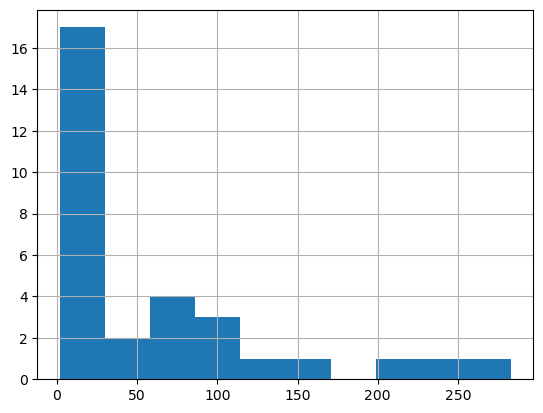

In [20]:
# Гистограмма 1

data['GDP'].hist()

Гистограмма 1 демонстрирует, что для экономики Республики Корея в 1960-1990 гг. гораздо чаще встрчеаются оценки в диапазине 2-25 млрд долл. США, тогда как показатели от приблизительно 120 млрд долл. США являются скорее редкими.

<Axes: >

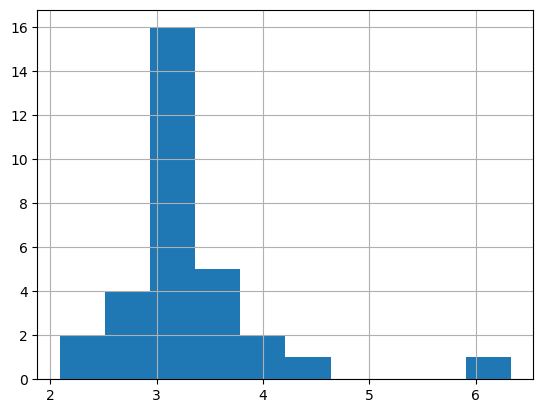

In [21]:
# Гистограмма 2

data['Educational expenditures'].hist()

Гистограмма 2 демонстрирует, что характерные траты в сфере образования для южнокорейского правительства составляли примерно 3-3,5 млрд долл. США.

<Axes: >

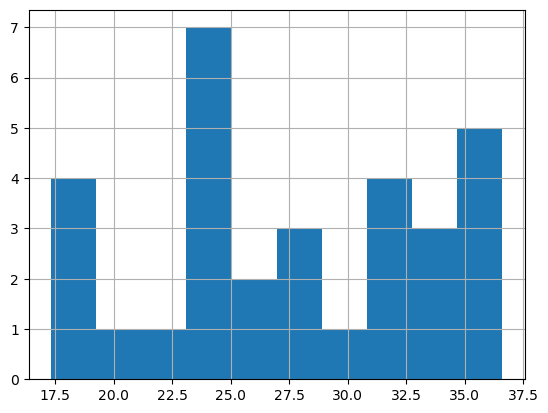

In [22]:
# Гистограмма 3

data['Industry'].hist()

Гистограмма 3 демонстрирует, что наиболее часто встречающейся долей промышленного производства в Республике Корея в 1960-1990 гг. находится в диапазоне 23-25%.

<Axes: xlabel='Inflation', ylabel='GDP'>

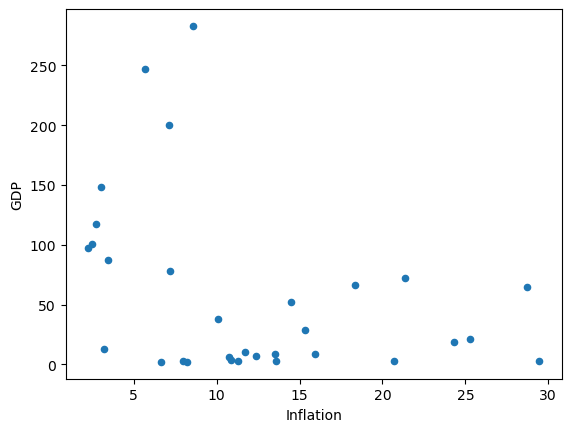

In [23]:
# Диаграмма рассеяния 1

data.plot('Inflation', 'GDP', kind = "scatter")

Диаграмма рассеяния 1 демонстрирует обратную прямую зависимость между переменными ВВП на душу населения и инфляцией.

<Axes: xlabel='Reserves', ylabel='GDP'>

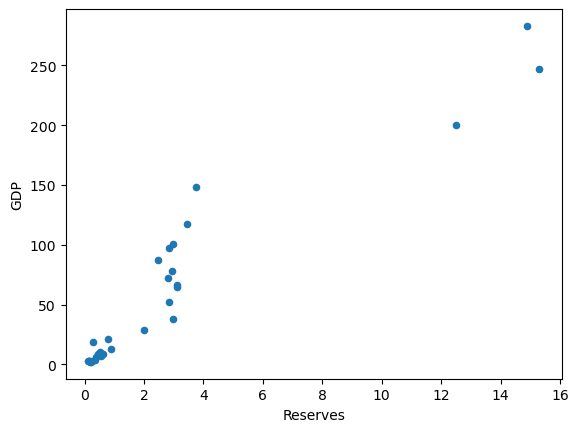

In [24]:
# Диаграмма рассеяния 2

data.plot('Reserves', 'GDP', kind = "scatter")

Диаграмма рассеяния 2 демонстрирует прямую положительную взаимосвязь между переменными ВВП и золотовалютными запасами.

<Axes: xlabel='Urban population', ylabel='GDP'>

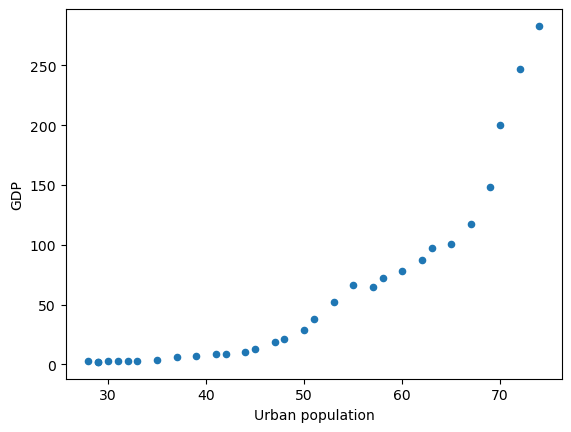

In [25]:
# Диаграмма рассеяния 3

data.plot('Urban population', 'GDP', kind = "scatter")

Диаграмма рассеяния 3 демонстрирует прямую положительную взаимосвязь между ростом ВВП и миграцией населения в города.

**Формулировка гипотез**

1. Как государственные расходы на образование зависят от ВВП?

In [26]:
data['GDP'].corr(data['Educational expenditures'])

0.07257999002602492

<Axes: xlabel='GDP', ylabel='Educational expenditures'>

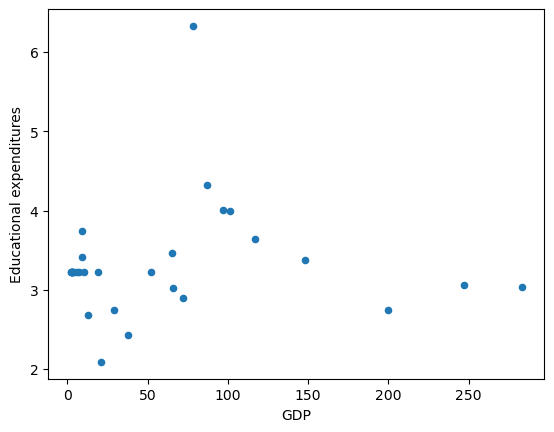

In [27]:
data.plot('GDP', 'Educational expenditures', kind = "scatter")

Значение корреляции приближено к 0, и диаграмма рассеяния не отражает какого-либо тренда. Следовательно, фактически прямой взаимосвязи переменных нет.

2. Как товарный экспорт влияет на ВВП?

In [28]:
data['GDP'].corr(data['Goods export'])

0.9875442442008491

<Axes: xlabel='Goods export', ylabel='GDP'>

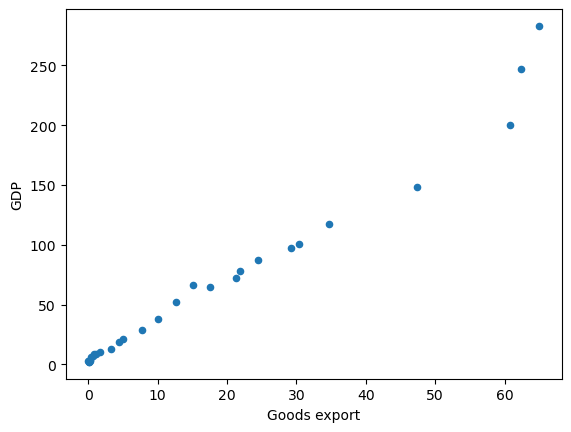

In [28]:
data.plot('Goods export', 'GDP', kind = "scatter")

Значение корреляции приближено к 1, и диаграмма рассеяния отражает положительный тренд роста. Следовательно, существует прямая положительная взаимосвязь между переменными.

**Выводы**

1) Почти во всех колонках датасета встречаются данные, похожие на выбросы, но они обусловлены историческим экономическим контекстом.
2) Инфляция коррелирует со всеми показателями линейной отрицательной взаимосвязью.
3) Государственные расходы имеют слабую корреляцию со всеми показателями, ввиду чего данные могут быть не актуальны для исследования.
4) В стобцах "Electronics", "Electricity consumption", 'Educational expenditure" встретилось достаточно значительное количество пропусков (32%, 35%, 38% соответственно), что может усложнить анализ их взаимосвязи с общим ростом экономики Республика Корея.
5) Для части показателей абсолютным максимум в данных будет служить 1990 год, а минимумом - 1960 год (за исключением ВВП на душу населения, импорта, экспорта, золотовалютных резервов и государственных затрат на образование).
6) Большинство показателей экономики и уровня жизни отражают сильную корреляцию с ВВП.

**Дальнейшее исследование (этап 2)**

In [29]:
data.head(8)

,Year,GDP,GDP per capita,Inflation,Export,Import,Reserves,Industry,Goods export,Electronics,Urban population,Electricity consumption,Educational expenditures
0,1960,3,158.27,7.97,2.64,11.96,0.157,17.33,0.032,0.00283,28.0,943.0,3.22
1,1961,2,93.83,8.20,4.04,13.95,0.207,17.90,0.041,0.00283,29.0,943.0,3.22
2,1962,2,106.16,6.62,3.88,15.61,0.169,17.90,0.056,0.00283,29.0,943.0,3.22
3,1963,3,146.30,20.69,3.95,14.66,0.131,18.07,0.087,0.00283,30.0,943.0,3.22
4,1964,3,123.61,29.46,4.96,12.38,0.136,19.35,0.118,0.00283,31.0,943.0,3.22
5,1965,3,108.72,13.55,7.13,14.33,0.146,23.29,0.173,0.00283,32.0,943.0,3.22
6,1966,3,133.48,11.26,8.44,18.22,0.245,23.06,0.251,0.00283,33.0,943.0,3.22
7,1967,4,161.16,10.88,9.11,19.68,0.357,23.34,0.321,0.00283,35.0,943.0,3.22


Одной из важнейших целей, которое ставило перед собой южнокорейское правительство в 1950-е гг., было восстановление и развитие промышленного производства, для чего была провозглашена политика импортнозамещения. Однако главнейшей проблемой являлось отсутствие эффективных ГЭС, из-за чего на юге полуострова постоянно возникали проблемы, связанные с недостатком электроэнергии. 
С 1960 гг. Южная Корея смогла стабилизировать ситуацию в нескольких легких отраслях (например, текстильной), что позволило стране быстро переориентироваться с импортозамещения на экспортный тип экономики. К концу десятилетия правительство через чеболей начало вводить производства новой продукции - электронники - заимствованной из Японии и США.

=> Имеет смысл рассмотреть взаимосвязь таких показателей, как ВВП и ВВП на душу населения с:
- потреблением электричества на душу населения (Electricity consumption);
- объемом промышленность (Industry);
- объемом экспорта (Export);
- объемом производства электронной промышленности (Electronics).

*Гипотезы:*
1) ключевую роль в экономическом росте РК в 1960-е гг. сыграла электронная промышленность за счет повышения экспорта;
2) ключевую роль в экономическом росте РК в 1960-е гг. сыграла только промышленность за счет повышения экспорта.

Для начала убедимся, что товарный экспорт и ВВП имеют взаимосвязь, для чего построим диаграмму рассеяния для этих двух переменных:

<Axes: xlabel='Goods export', ylabel='GDP'>

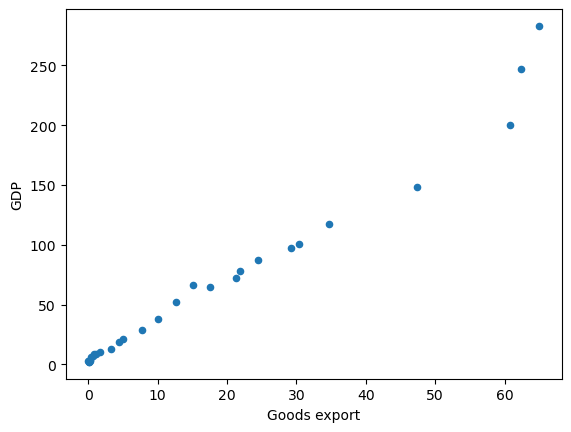

In [30]:
data.plot('Goods export', 'GDP', kind = "scatter")

Становится очевидным, что взаимосвязь характеризуется как линейная и сильно положительная.

Но для дальнейшего анализа будем использовать не сам товарный экспорт, а сальдо торгового баланса, для чего будем вычитать из доли экспорта (Export) процент импорта (Import) и умножать на ВВП (GDP). - Новый стобец saldo.
Точно также рассчитаем номинальное значение промышленного производства: умножим значения переменной Industry на значения перемнной GDP. - Новый стобец ind_value.

In [31]:
data['saldo'] = (data['Export'] - data['Import']) * 0.01 * data['GDP']
data['ind_value'] = data['Industry'] * 0.01 * data['GDP']

Для более верной оценки влияния переменных на ВВП РК будем рассчитывать показатели не для базового года, а для следующего. Для этого сдвинем показатели ВВП на одну единицу и сохраним их в переменную new:

In [32]:
data['new'] = data['GDP'].shift(-1)
data = data.iloc[:-1, :]

Построим регрессионную модель на базе новых переменных.

Целевая - ВВП со сдвигом на единицу.

Предикторы - сальдо торгового баланса, промышленное производство и электронная промышленность.

In [33]:
import statsmodels.api as sm

# модель №1
X = sm.add_constant(data[['saldo', 'ind_value', 'Electronics']])
Y = data['new']                        
gdp_model = sm.OLS(Y, X).fit()

In [34]:
gdp_model.params

const             9.996139
saldo             1.982795
ind_value         3.586266
Electronics   -2387.261595
dtype: float64

*Интерпретация результатов*

1) При нулевых показателях сальдо торгового баланса, промышленног производства и производства электроники ВВП показывает рост в 10 млрд долл. США.
2) При увеличении сальдо торгового баланса на 1 млрд долл. США, ВВП увеличиться на 1.98 млрд долл. США.
3) При увеличении промышленного производства на 1 млрд долл. США, ВВП увеличиться на 3.59 млрд долл. США.
4) При увеличении производства электроники на 1 млрд долл. США, ВВП снизится на 2387 млрд долл. США.

4-ый вывод выглядит крайне нереалистично, что можно связать с масштабом показателей производства электроники в целом (за период 1960-1990 гг. оно ни разу не достигало хотя бы одного млрд долл. США). Поэтому можно перевести показатели электроники в млн долл. США и построить новую модель:

In [35]:
data['Electronics'] = data['Electronics'] * 1000

In [38]:
# модель №2

X2 = sm.add_constant(data[['saldo', 'ind_value', 'Electronics']])
Y2 = data['new']                        
gdp_model_2 = sm.OLS(Y2, X2).fit()

In [40]:
gdp_model_2.params

const          9.996139
saldo          1.982795
ind_value      3.586266
Electronics   -2.387262
dtype: float64

Теперь можно сказать, что увеличение производства экономики на 1 млн долл. США вызовет снижение ВВП на 2.39 млрд долл. США. Цифры все еще слишком большие, но уже больше похожи на правду.

Также, создадим модель, в которой в качестве предикторов добавятся еще несколько переменных: потребление электричества на душу населения, инфляция и золотовалютные резервы.

In [77]:
# модель №3

X3 = sm.add_constant(data[['saldo', 'ind_value', 'Electronics', 'Electricity consumption', 'Inflation', 'Reserves']])
Y3 = data['new']                        
gdp_model_3 = sm.OLS(Y3, X3).fit()

In [78]:
gdp_model_3.params

const                      11.352958
saldo                       1.753961
ind_value                   3.831999
Electronics                -1.414359
Electricity consumption    -0.007008
Inflation                   0.155733
Reserves                   -2.116467
dtype: float64

На основе новой более ранжированной модели можно сделать следующие выводы:
1) При нулевых показателях переменных-предикторов ВВП показывает рост в 11.35 млрд долл. США.
2) При увеличении сальдо торгового баланса на 1 млрд долл. США ВВП увеличиться на 1.75 млрд долл. США.
3) При увеличении промышленного производства на 1 млрд долл. США ВВП увеличиться на 3.83 млрд долл. США.
4) При увеличении производства электроники на 1 млн долл. США ВВП снизится на 1.41 млрд долл. США.
5) При увеличении потребление электричества на 1 кВт на душу населения ВВП снизится на 7 млн долл. США.
6) При увеличении инфляции на 1% ВВП вырастет на 0.16 млрд долл. США (такой результат может быть связан с частой гиперинфляцией в РК в 1960-1990-е гг.).
7) При увеличении золотовалютных резервов РК на 1 млрд долл. США ВВП снизится на 2.12 млрд долл. США.

Рассчитаем среднеабсолютную ошибку для всех моделей:

In [94]:
Y_pr = gdp_model.predict(X)
MAE = sum(abs(Y-Y_pr))/len(Y)
MAE

4.483696706526952

In [95]:
mean_gdp = data['new'].mean()
relative_error = (MAE / mean_gdp) * 100
print(f'Среднеабсолютная ошибка для модели №1: {round(relative_error, 2)}%')

Среднеабсолютная ошибка для модели №1: 7.5%


In [96]:
Y_pr_2 = gdp_model_2.predict(X2)
MAE_2 = sum(abs(Y2-Y_pr_2))/len(Y2)
MAE_2

4.474560954577426

In [103]:
relative_error_2 = (MAE_2 / mean_gdp) * 100
print(f'Среднеабсолютная ошибка для модели №2: {round(relative_error_2, 2)}%')

Среднеабсолютная ошибка для модели №2: 7.48%


In [101]:
Y_pr_3 = gdp_model_3.predict(X3)
MAE_3 = sum(abs(Y3-Y_pr_3))/len(Y3)
MAE_3

4.019992797372576

In [102]:
relative_error_3 = (MAE_3 / mean_gdp) * 100
print(f'Среднеабсолютная ошибка для модели №3: {round(relative_error_3, 2)}%')

Среднеабсолютная ошибка для модели №3: 6.72%


Таким образом, наилучшей для анализа и проверки гипотез является модель №3.

In [106]:
gdp_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    new   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     723.8
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           5.26e-25
Time:                        17:21:21   Log-Likelihood:                -92.863
No. Observations:                  30   AIC:                             199.7
Df Residuals:                      23   BIC:                             209.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      11.3530      6.196      1.832      0.080      -1.464      24.170
saldo                       1.7540      0.818      2.144      0.043       0.062       3.446
ind_value                   3.8320      0.243     15.749      0.000       3.329       4.335
Electronics                -1.4144      1.796     -0.788      0.439      -5.129       2.300
Electricity consumption    -0.0070      0.010     -0.713      0.483      -0.027       0.013
Inflation                   0.1557      0.177      0.880      0.388      -0.210       0.522
Reserves                   -2.1165      0.958     -2.210      0.037      -4.098      -0.135
==============================================================================
Omnibus:                        2.713   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                1.486
Skew:                          -0.175   Prob(JB):                        0.476
Kurtosis:                       4.032   Cond. No.                     5.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Выводы**

В конце концов, подтвердилась гипотеза о том, что в развитие экономики РК в 1960-1990 гг. самый значительный вклад внесло промышленное производство, которое способствовало росту ВВП на 3.83 млрд долл. США. Такой вывод более чем соответствует исторической действительности: в 1960-е гг.. РК активно развивала сначала легкую промышенность, а к концу десятилетия начала закладывать основы индустриальных конгломератов, которые активно способствовали становлению тяжелой отрасли в стране.

При этом гипотеза о значимости сферы электроники оказалась полностью опровергнутой, так как из модели №3 становится очевидным тот факт, что в 1960-1990-е гг. эта отрасль только развивалась и не достигла своей точки окупаемости. Согласно научной литературе о данном периоде, электронная промышленность начала приносить доход РК только к концу 1990-х гг.

Значимыми переменными оказались:
- промышленное производство (пункт выше);
- сальдо торгового баланса: построение экспортно-ориентированной экономики;
- золотовалютные резервы: в 1960-1990-е гг. экономика РК переживала многие кризиса, на протяжение всего периода была характерна гиперинфляция и т.д., и страна активно накапливала внешнеэкономические долги, которые не давали возможности поддерживать ЗВР на приемлемом для государства уровне.
(Доверительные интервалы этих переменных не включают нули.)

*Перспективы*

1) В качестве дальнейшего исследования было бы интересно изучить эти же данные, но при помощи других более сложных моделей, подходящих для экономических статистик.
2) Также было бы интересно изучить влияние стремительного роста ВВП Южной Кореи на социальную сферу. В этом исследование очень кратко были рассмотрены государственные расходы на образование, которые почти не менялись за весь период, однако хотелось бы увидеть в разрезе, что происходило в этой сфере в 1960-1990-е гг.: увеличение/упадок количества школ, преподавателей и университетов; динамика заработной платы преподавателей и динамика цен на образование.